<a href="https://colab.research.google.com/github/lapatradaa/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

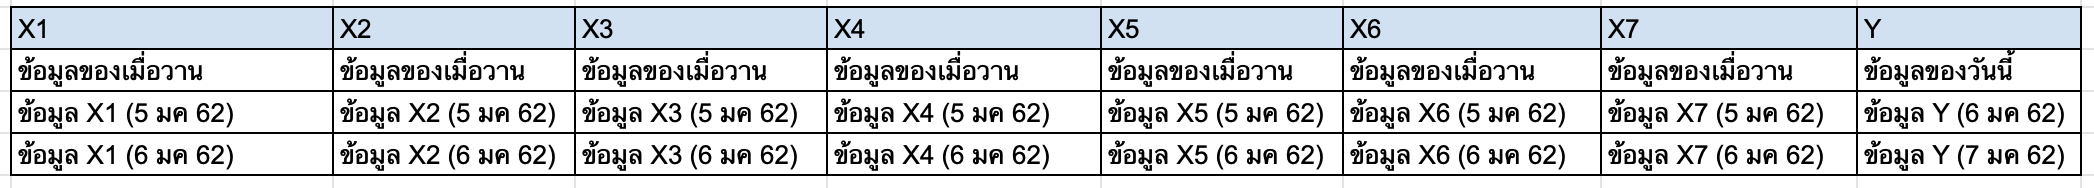

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
import pandas as pd
import numpy as np
import os

In [3]:
#### /content/drive/MyDrive/bsc_dpdm23/อุตุ

## metadata



## data

In [183]:
#ความกด(เปอร์เซ็นต์)(atm)
atm_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
atm_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
atm_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
atm_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
atm_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความชื้นสัมพัทธ์(เปอร์เซ็นต์) relative humidity
rh_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
rh_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
rh_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
rh_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
rh_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความเร็วลม(นอต)
wind_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
wind_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
wind_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
wind_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
wind_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)

#จำนวนเมฆ(10ส่วน)
cloud_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
cloud_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
cloud_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
cloud_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
cloud_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)

#ปริมาณฝน(มิลลิเมตร)
rain_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
rain_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
rain_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
rain_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
rain_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)

#อุณหภูมิจุดน้ำค้าง(เซลเซียส) dew point temperature
dp_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dp_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dp_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dp_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dp_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิตุ้มแห้ง(เซลเซียส) dry
dry_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dry_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dry_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dry_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dry_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิต่ำสุด(เซลเซียส)
low_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
low_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
low_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
low_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
low_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)

##cleaning

### manage columns

In [184]:
#rename columns
renames = [atm_kkn, atm_npm, atm_snk, atm_nki, atm_lei,
             rh_kkn, rh_npm, rh_snk, rh_nki, rh_lei,
             wind_kkn, wind_npm, wind_snk, wind_nki, wind_lei,
             cloud_kkn, cloud_npm, cloud_snk, cloud_nki, cloud_lei,
             rain_kkn, rain_npm, rain_snk, rain_nki, rain_lei,
             dp_kkn, dp_npm, dp_snk, dp_nki, dp_lei,
             dry_kkn, dry_npm, dry_snk, dry_nki, dry_lei,
             low_kkn, low_npm, low_snk, low_nki, low_lei]
for df in renames :
    df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'}, inplace=True)

In [186]:
atm_kkn['year'] = atm_kkn['เดือน/ปี'].dt.year
atm_kkn['month'] = atm_kkn['เดือน/ปี'].dt.month
## drop mean in table
atm_kkn = atm_kkn.drop(['เดือน/ปี','เฉลี่ย'], axis =1)

In [185]:
atm_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


In [7]:
# delete some columns
cloud_lei = cloud_lei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

### fix date

In [174]:
atm_kkn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ที่       55 non-null     object        
 1   สถานี     55 non-null     object        
 2   เดือน/ปี  55 non-null     datetime64[ns]
 3   1         55 non-null     float64       
 4   2         55 non-null     float64       
 5   3         55 non-null     float64       
 6   4         55 non-null     float64       
 7   5         55 non-null     float64       
 8   6         55 non-null     float64       
 9   7         55 non-null     float64       
 10  8         55 non-null     float64       
 11  9         55 non-null     float64       
 12  10        55 non-null     float64       
 13  11        55 non-null     float64       
 14  12        55 non-null     float64       
 15  13        55 non-null     float64       
 16  14        55 non-null     float64       
 17  15        55 non-n

In [175]:
atm_kkn['Unnamed: 2'] = pd.to_datetime(atm_kkn['Unnamed: 2'], errors='coerce')

KeyError: 'Unnamed: 2'

In [170]:
def fix_dates(row):
  year = row['Unnamed: 2'].year
  if year % 4 == 0: # year where feb has 29
    if row['Unnamed: 2'].month == 2: # february
      row['Unnamed: 32'] = np.nan # 30
      row['Unnamed: 33'] = np.nan # 31
    elif row['Unnamed: 2'].month % 2 == 0:
      row[31] = np.nan
  else:
    if row['Unnamed: 2'].month == 2: # year where feb has 28
      row['Unnamed: 31'] = np.nan # 29
      row['Unnamed: 32'] = np.nan # 30
      row['Unnamed: 33'] = np.nan # 31
    elif row['Unnamed: 2'].month % 2 == 0:
      row['Unnamed : 33'] = np.nan
  return row

In [ ]:
df = df.apply(fix_dates, axis=1)


### missing vaules
replace
*   '-' by mean
*   T by 0.099

####ความกด(เปอร์เซ็นต์)(atm)


#####ขอนแก่น

In [8]:
atm_kkn = atm_kkn.replace('-',np.NaN)

In [9]:
for i in range(len(atm_kkn['ที่'])):atm_kkn.iloc[i,:] = atm_kkn.iloc[i,:].fillna(atm_kkn.iloc[i]['เฉลี่ย'])

In [10]:
atm_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [11]:
atm_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


#####นครพนม

In [12]:
atm_npm = atm_npm.replace('-',np.NaN)

In [13]:
for i in range(len(atm_npm['ที่'])):atm_npm.iloc[i,:] = atm_npm.iloc[i,:].fillna(atm_npm.iloc[i]['เฉลี่ย'])

In [14]:
atm_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [15]:
atm_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.430000,1011.690000,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.600000,1011.130000,1012.184667,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.640000,1016.890000,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.950000,1013.770000,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.290000,1011.130000,1010.608000,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.940000,1009.540000,1012.760000,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.660000,1009.890000,1010.984000,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.690000,1014.480000,1016.220000,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.920000,1015.570000,1016.140000,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,1012.171429,1012.171429,1012.171429,1012.171429


#####สกลนคร

In [16]:
atm_snk = atm_snk.replace('-',np.NaN)

In [17]:
for i in range(len(atm_snk['ที่'])):atm_snk.iloc[i,:] = atm_snk.iloc[i,:].fillna(atm_snk.iloc[i]['เฉลี่ย'])

In [18]:
atm_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [19]:
atm_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.520000,1011.870000,1012.210000,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.780000,1011.060000,1012.255000,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.800000,1016.960000,1017.630000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.950000,1013.860000,1015.520000,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.250000,1011.060000,1010.554000,1010.554000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,...,1011.86,1010.66,1010.31,1009.83,1008.81,1008.29,1008.930000,1009.380000,1012.620000,1010.898710
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,...,1008.84,1011.12,1011.66,1011.47,1011.38,1010.89,1010.670000,1009.880000,1011.054333,1011.054333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,...,1016.55,1017.46,1014.48,1012.58,1011.33,1010.65,1010.820000,1014.190000,1016.290000,1012.625806
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,...,1014.27,1013.68,1013.54,1013.54,1015.37,1017.02,1015.940000,1015.750000,1016.680000,1014.938387
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,...,1017.21,1014.62,1012.56,1011.07,1008.70,1007.22,1012.235000,1012.235000,1012.235000,1012.235000


In [20]:
for i in range(len(atm_npm['ที่'])):atm_npm.iloc[i,:] = atm_npm.iloc[i,:].fillna(atm_npm.iloc[i]['เฉลี่ย'])

In [21]:
atm_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#####หนองคาย

In [22]:
atm_nki = atm_nki.replace('-',np.NaN)

In [23]:
for i in range(len(atm_nki['ที่'])):atm_nki.iloc[i,:] = atm_nki.iloc[i,:].fillna(atm_nki.iloc[i]['เฉลี่ย'])

In [24]:
atm_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [25]:
atm_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.880000,1011.770000,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.710000,1011.100000,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.630000,1016.310000,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.960000,1013.160000,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.070000,1011.100000,1010.214667,1010.214667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.66,1011.44,1008.66,1006.94,1008.62,1011.05,1010.61,...,1011.80,1010.75,1010.30,1009.82,1009.26,1008.40,1008.970000,1008.890000,1012.230000,1010.823871
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.25,1011.65,1010.88,1010.79,1010.84,1011.38,1009.94,...,1009.16,1010.86,1011.62,1011.53,1011.11,1010.83,1010.740000,1010.100000,1010.951667,1010.951667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.04,1010.28,1011.34,1011.40,1011.31,1013.40,1012.42,...,1015.72,1017.22,1014.72,1012.86,1011.53,1010.58,1010.920000,1012.660000,1015.720000,1012.494516
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.38,1014.02,1014.56,1014.07,1012.31,1012.87,1013.07,...,1013.98,1013.14,1012.74,1013.02,1015.21,1016.80,1015.970000,1015.360000,1017.110000,1014.523871
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1016.12,1015.23,1014.67,1014.85,1014.34,1011.44,1008.49,...,1016.37,1014.56,1012.50,1010.69,1008.41,1006.75,1011.956786,1011.956786,1011.956786,1011.956786


#####เลย

In [26]:
atm_lei = atm_lei.replace('-',np.NaN)

In [27]:
for i in range(len(atm_lei['ที่'])):atm_lei.iloc[i,:] = atm_lei.iloc[i,:].fillna(atm_lei.iloc[i]['เฉลี่ย'])

In [28]:
atm_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [29]:
atm_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.690000,1011.270000,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.100000,1010.430000,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.490000,1014.970000,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.160000,1012.610000,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.520000,1010.430000,1009.516667,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.570000,1008.670000,1011.740000,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.110000,1009.830000,1010.542667,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.230000,1011.630000,1014.750000,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.810000,1014.810000,1016.390000,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,1011.348571,1011.348571,1011.348571,1011.348571


####ความชื้นสัมพัทธ์(เปอร์เซ็นต์) relative humidity


#####ขอนแก่น

In [30]:
rh_kkn = rh_kkn.replace('-',np.NaN)

In [31]:
for i in range(len(rh_kkn['ที่'])):rh_kkn.iloc[i,:] = rh_kkn.iloc[i,:].fillna(rh_kkn.iloc[i]['เฉลี่ย'])

In [32]:
rh_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [33]:
rh_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69.0,74.0,68.0,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75.0,74.0,68.0,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57.0,55.0,54.0,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78.0,71.0,72.0,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,55.0,55.0,55.0,55


#####นครพนม

In [34]:
rh_npm = rh_npm.replace('-',np.NaN)

In [35]:
for i in range(len(rh_npm['ที่'])):rh_npm.iloc[i,:] = rh_npm.iloc[i,:].fillna(rh_npm.iloc[i]['เฉลี่ย'])

In [36]:
rh_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [37]:
rh_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65
5,3,357201-นครพนม จ.นครพนม,2012-10-01,68,72,74,79,81,66,72,...,69,69,64,66,67,73,75.0,76.0,66.0,70
6,4,357201-นครพนม จ.นครพนม,2012-11-01,67,69,71,70,69,67,68,...,66,76,80,74,63,69,82.0,78.0,70.0,70
7,5,357201-นครพนม จ.นครพนม,2012-12-01,76,73,70,70,70,61,68,...,54,61,65,64,67,68,62.0,54.0,56.0,67
8,6,357201-นครพนม จ.นครพนม,2013-01-01,62,67,64,69,69,60,67,...,59,64,61,72,66,82,70.0,64.0,71.0,65
9,7,357201-นครพนม จ.นครพนม,2013-02-01,72,62,71,69,64,63,61,...,58,60,62,60,59,62,61.0,61.0,61.0,61


#####สกลนคร

In [38]:
rh_snk = rh_snk.replace('-',np.NaN)

In [39]:
for i in range(len(rh_snk['ที่'])):rh_snk.iloc[i,:] = rh_snk.iloc[i,:].fillna(rh_snk.iloc[i]['เฉลี่ย'])

In [40]:
rh_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

#####หนองคาย

In [41]:
rh_nki = rh_nki.replace('-',np.NaN)

In [42]:
for i in range(len(rh_nki['ที่'])):rh_nki.iloc[i,:] = rh_nki.iloc[i,:].fillna(rh_nki.iloc[i]['เฉลี่ย'])

In [43]:
rh_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [44]:
rh_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,69,70,74,81,84,79,68,...,69,70,70,70,69,67,69.0,72.0,60.0,72
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,63,68,69,70,67,69,68,...,70,74,79,77,76,72,84.0,76.0,71.0,71
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,76,74,71,73,75,66,73,...,61,62,63,68,69,71,69.0,63.0,59.0,69
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,67,68,66,68,69,68,67,...,67,64,66,67,86,83,76.0,68.0,88.0,68
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,81,77,74,69,67,65,57,...,53,57,61,59,60,65,64.0,64.0,64.0,64


#####เลย

In [45]:
rh_lei = rh_lei.replace('-',np.NaN)

In [46]:
for i in range(len(rh_lei['ที่'])):rh_lei.iloc[i,:] = rh_lei.iloc[i,:].fillna(rh_lei.iloc[i]['เฉลี่ย'])

In [47]:
rh_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [48]:
rh_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,87,84,92,91,90,91,88,...,80,81,81,80,80,76,79.0,80.0,75.0,84
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,72,80,80,84,82,83,78,...,82,89,87,87,85,86,88.0,84.0,82.0,82
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,84,83,88,87,85,76,82,...,75,70,78,81,77,79,81.0,73.0,67.0,80
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,78,77,75,74,77,77,77,...,72,75,79,76,88,86,82.0,78.0,92.0,76
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,85,83,79,72,73,72,66,...,59,63,67,64,66,71,69.0,69.0,69.0,69


####ความเร็วลม(นอต)


#####ขอนแก่น

In [49]:
wind_kkn = wind_kkn.replace('-',np.NaN)

In [50]:
for i in range(len(wind_kkn['ที่'])):wind_kkn.iloc[i,:] = wind_kkn.iloc[i,:].fillna(wind_kkn.iloc[i]['เฉลี่ย'])

In [51]:
wind_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [52]:
wind_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.000000,2,2,3,4,...,2,3,5,5,5,4,6.000000,4.000000,5.000000,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.000000,3,5,2,3,...,7,6,5,5,3,1,3.000000,3.000000,3.466667,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.000000,4,4,4,4,...,5,6,7,6,5,4,4.000000,6.000000,5.000000,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.000000,4,4,2,4,...,3,3,4,2,2,1,3.000000,4.000000,4.000000,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.000000,2,3,1,2,...,1,2,3,2,4,3,3.000000,3.000000,2.566667,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1.000000,2,2,5,7,...,6,4,2,4,5,2,2.000000,3.000000,5.000000,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0.000000,2,2,3,2,...,2,3,3,1,3,3,3.000000,3.000000,2.633333,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3.000000,3,4,4,4,...,5,5,5,5,5,4,3.000000,5.000000,6.000000,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4.000000,4,3,3,3,...,2,2,4,3,5,4,4.000000,3.000000,5.000000,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5.000000,4,3,2,2,...,9,6,3,4,4,2,3.000000,3.000000,3.633333,3.633333


#####นครพนม

In [53]:
wind_npm = wind_npm.replace('-',np.NaN)

In [54]:
for i in range(len(wind_npm['ที่'])):wind_npm.iloc[i,:] = wind_npm.iloc[i,:].fillna(wind_npm.iloc[i]['เฉลี่ย'])

In [55]:
wind_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [56]:
wind_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.000000,1.0,0,2.000000,...,1,2.000000,2.000000,1,2,2.000000,1.000000,1.000000,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.000000,1.0,1,1.000000,...,3,3.000000,2.000000,2,1,1.000000,1.000000,1.000000,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.000000,1.0,1,1.000000,...,1,3.000000,3.000000,1,2,1.000000,1.000000,2.000000,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.000000,2.0,3,3.000000,...,4,1.000000,5.000000,1,1,1.000000,4.000000,5.000000,4.000000,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.000000,0.0,1,1.000000,...,1,2.000000,2.000000,3,3,3.000000,1.000000,2.000000,2.200000,2.200000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,2,2.000000,2.0,2,2.000000,...,3,1.000000,2.000000,2,2,1.000000,1.000000,1.000000,3.000000,1.774194
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2.000000,2.0,2,0.000000,...,2,1.000000,1.000000,1,3,1.000000,2.000000,1.000000,1.571429,1.571429
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,2,3,1.000000,2.0,4,3.000000,...,5,3.000000,2.000000,2,3,3.000000,3.000000,5.000000,4.000000,2.193548
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2.000000,1.0,2,2.000000,...,2,0.000000,3.000000,2,3,0.000000,1.000000,1.000000,2.000000,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2.000000,1.0,2,3.000000,...,3,2.000000,2.000000,2,2,3.000000,3.000000,3.000000,2.233333,2.233333


#####สกลนคร

In [57]:
wind_snk = wind_snk.replace('-',np.NaN)

In [58]:
for i in range(len(wind_snk['ที่'])):wind_snk.iloc[i,:] = wind_snk.iloc[i,:].fillna(wind_snk.iloc[i]['เฉลี่ย'])

In [59]:
wind_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [60]:
wind_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.000000,1,0,2,...,1,2,2,1,2,2,1.000000,1.000000,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.000000,1,1,1,...,3,3,2,2,1,1,1.000000,1.000000,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.000000,1,1,1,...,1,3,3,1,2,1,1.000000,2.000000,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.000000,3,2,4,...,5,4,5,3,2,3,3.000000,3.000000,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.000000,1,2,2,...,1,2,1,3,7,5,3.000000,2.000000,2.733333,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1.000000,5,3,2,...,3,2,1,2,1,1,2.000000,3.000000,4.000000,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3.000000,3,1,1,...,2,3,2,2,4,4,2.000000,2.000000,2.266667,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2.000000,2,3,2,...,5,3,3,1,2,2,2.000000,5.000000,4.000000,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2.000000,1,2,2,...,2,0,3,2,3,0,1.000000,1.000000,2.000000,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2.000000,1,2,3,...,3,2,2,2,2,3,3.000000,3.000000,2.233333,2.233333


#####หนองคาย

In [61]:
wind_nki = wind_nki.replace('-',np.NaN)

In [62]:
for i in range(len(wind_nki['ที่'])):wind_nki.iloc[i,:] = wind_nki.iloc[i,:].fillna(wind_nki.iloc[i]['เฉลี่ย'])

In [63]:
wind_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [64]:
wind_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.000000,1,3,1,...,2,2,3,3,3,3,3.000000,3.000000,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.000000,2,1,2,...,7,4,2,3,2,2,2.000000,2.000000,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.000000,2,2,2,...,3,6,5,4,2,2,2.000000,3.000000,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.000000,3,2,4,...,5,4,5,3,2,3,3.000000,3.000000,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.000000,1,2,2,...,1,2,1,3,7,5,3.000000,2.000000,2.733333,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1.000000,5,3,2,...,3,2,1,2,1,1,2.000000,3.000000,4.000000,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3.000000,3,1,1,...,2,3,2,2,4,4,2.000000,2.000000,2.266667,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2.000000,2,3,2,...,5,3,3,1,2,2,2.000000,5.000000,4.000000,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,2.000000,1,2,2,...,2,2,2,4,3,3,1.000000,2.000000,2.000000,2.387097
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2.000000,1,2,3,...,3,2,2,2,2,3,3.000000,3.000000,2.233333,2.233333


#####เลย

In [65]:
wind_lei = wind_lei.replace('-',np.NaN)

In [66]:
for i in range(len(wind_lei['ที่'])):wind_lei.iloc[i,:] = wind_lei.iloc[i,:].fillna(wind_lei.iloc[i]['เฉลี่ย'])

In [67]:
wind_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [68]:
wind_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.000000,2,1,...,1,1.0,2,2,1,2,2.000000,2.000000,1.000000,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.000000,2,2,...,3,2.0,1,1,2,1,2.000000,1.000000,1.700000,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.000000,2,1,...,1,2.0,3,2,1,2,1.000000,2.000000,2.000000,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.000000,2,2,...,2,1.0,3,2,2,2,2.000000,1.000000,1.000000,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.000000,2,1,...,1,1.0,1,1,3,4,2.000000,1.000000,1.700000,1.700000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,1,3,3.000000,3,2,...,2,2.0,2,2,2,3,2.000000,2.000000,1.000000,1.838710
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,1,2,2.000000,2,2,...,2,2.0,1,2,1,2,3.000000,2.000000,1.833333,1.833333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,4,3,2,2.000000,4,1,...,3,3.0,2,1,2,2,2.000000,3.000000,4.000000,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,1,1,2,2,1.000000,2,1,...,1,2.0,2,2,3,3,1.000000,2.000000,2.000000,2.032258
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,1,1,3,1.000000,1,2,...,4,3.0,1,2,1,2,3.000000,3.000000,2.133333,2.133333


####จำนวนเมฆ(10ส่วน)

#####ขอนแก่น

In [69]:
cloud_kkn = cloud_kkn.replace('-',np.NaN)

In [70]:
for i in range(len(cloud_kkn['ที่'])):cloud_kkn.iloc[i,:] = cloud_kkn.iloc[i,:].fillna(cloud_kkn.iloc[i]['เฉลี่ย'])

In [71]:
cloud_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [72]:
cloud_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.000000,8,10,10,10,...,2,3,5,3,3,5,4.000000,2.000000,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.000000,2,3,6,9,...,6,6,3,2,2,1,3.000000,2.000000,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.000000,4,5,8,7,...,5,5,3,3,1,2,1.000000,1.000000,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.000000,6,3,1,3,...,6,4,4,3,2,5,6.000000,10.000000,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.000000,8,3,3,1,...,1,2,0,1,4,5,1.000000,2.000000,2.533333,2.533333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,3.000000,7,8,7,9,...,5,5,3,4,3,6,5.000000,5.000000,4.000000,4.548387
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,4,4,2.000000,3,3,3,2,...,5,8,8,5,7,6,7.000000,5.000000,4.966667,4.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,5,5.000000,6,5,5,5,...,7,3,5,6,3,1,2.000000,3.000000,6.000000,3.741935
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4.000000,4,3,3,3,...,2,2,4,3,5,4,4.000000,3.000000,5.000000,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5.000000,4,3,2,2,...,9,6,3,4,4,2,3.000000,3.000000,3.633333,3.633333


#####นครพนม

In [73]:
cloud_npm = cloud_npm.replace('-',np.NaN)

In [74]:
for i in range(len(cloud_npm['ที่'])):cloud_npm.iloc[i,:] = cloud_npm.iloc[i,:].fillna(cloud_npm.iloc[i]['เฉลี่ย'])

In [75]:
cloud_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [76]:
cloud_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.000000,7.000000,8.000000,8.000000,10.000000,10.000000,9.000000,...,2.000000,2.000000,2.000000,2,3.000000,3,4.000000,2.000000,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.000000,2.000000,2.000000,3.000000,5.000000,7.000000,9.000000,...,4.000000,4.000000,4.000000,2,2.000000,2,1.000000,1.000000,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.000000,2.000000,2.000000,4.000000,4.000000,7.000000,8.000000,...,4.000000,2.000000,2.000000,2,2.000000,1,2.000000,1.000000,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.000000,1.000000,4.000000,6.000000,4.000000,2.000000,5.000000,...,5.000000,3.000000,2.000000,2,2.000000,3,3.000000,6.000000,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.000000,5.000000,8.000000,7.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,3,7.000000,6,2.000000,1.000000,2.966667,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5.000000,3.000000,4.000000,7.000000,7.000000,5.000000,6.000000,...,3.000000,3.000000,2.000000,3,3.000000,8,6.000000,5.000000,3.000000,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,2.000000,...,4.000000,7.000000,5.000000,4,3.000000,5,8.000000,4.000000,3.966667,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5.000000,4.000000,6.000000,6.000000,4.000000,3.000000,4.000000,...,4.000000,2.000000,6.000000,9,3.000000,2,2.000000,1.000000,4.000000,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4.000000,3.000000,2.000000,6.000000,3.000000,4.000000,5.000000,...,0.000000,3.000000,5.000000,7,7.000000,9,3.000000,5.000000,6.000000,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3.000000,7.000000,7.000000,5.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,3,4.000000,4,3.000000,3.000000,3.166667,3.166667


#####สกลนคร

In [77]:
cloud_snk = cloud_snk.replace('-',np.NaN)

In [78]:
for i in range(len(cloud_snk['ที่'])):cloud_snk.iloc[i,:] = cloud_snk.iloc[i,:].fillna(cloud_snk.iloc[i]['เฉลี่ย'])

In [79]:
cloud_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [80]:
cloud_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.000000,9.000000,7.000000,7.000000,9.000000,10.000000,8.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.000000,0.000000,0.000000,1.000000,3.000000,7.000000,8.000000,...,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.000000,1.000000,2.000000,2.000000,2.000000,6.000000,6.000000,...,3.000000,2.000000,2.703704,0.000000,0.000000,0.000000,0.000000,1.000000,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.000000,0.000000,4.000000,3.000000,2.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,3.000000,0.000000,1.000000,4.000000,7.000000,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.000000,4.000000,8.000000,5.000000,1.000000,0.000000,0.000000,...,2.142857,2.142857,2.142857,1.000000,6.000000,4.000000,0.000000,0.000000,2.142857,2.142857
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,0.000000,0.000000,1.000000,5.000000,6.000000,4.000000,7.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,6.000000,5.000000,1.000000,2.419355
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,...,4.000000,8.000000,5.000000,2.000000,1.000000,6.000000,7.000000,5.000000,2.933333,2.933333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000,...,3.000000,1.000000,6.000000,7.000000,3.000000,1.000000,0.000000,1.000000,4.000000,2.137931
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.000000,1.000000,1.000000,5.000000,0.000000,2.000000,2.000000,...,2.928571,1.000000,2.000000,5.000000,6.000000,9.000000,2.000000,6.000000,9.000000,2.928571
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2.000000,6.000000,8.000000,5.000000,1.000000,0.000000,0.000000,...,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.074074,2.074074


#####หนองคาย

In [81]:
cloud_nki = cloud_nki.replace('-',np.NaN)

In [82]:
for i in range(len(cloud_nki['ที่'])):cloud_nki.iloc[i,:] = cloud_nki.iloc[i,:].fillna(cloud_nki.iloc[i]['เฉลี่ย'])

In [83]:
cloud_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [84]:
cloud_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.000000,10.000000,8.000000,9.00,9.000000,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.000000,0.000000,0.000000,1.00,1.000000,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.000000,2.000000,4.000000,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.000000,4.000000,3.285714,2.00,7.000000,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.000000,1.000000,1.000000,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.000000,1.000000,3.000000,6.00,8.000000,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.000000,0.000000,6.000000,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.000000,8.000000,10.000000,6.00,1.000000,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.000000,5.000000,6.000000,4.928571,4.928571,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1.000000,1.000000,5.000000,8.00,8.000000,7.000000,2.000000,...,4.000000,1.000000,2.000000,4.000000,1.000000,3.000000,4.000000,3.000000,4.000000,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2.000000,1.000000,0.000000,6.00,3.000000,2.000000,2.000000,...,2.000000,8.000000,7.000000,6.000000,6.000000,8.000000,8.000000,4.000000,3.900000,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4.000000,3.000000,7.000000,5.00,3.000000,3.000000,4.000000,...,4.000000,4.000000,7.000000,9.000000,2.000000,1.000000,0.000000,3.000000,4.000000,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4.000000,2.000000,0.000000,1.00,1.000000,3.000000,1.000000,...,1.000000,4.000000,3.000000,7.000000,10.000000,10.000000,5.000000,4.000000,10.000000,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4.000000,8.000000,8.000000,5.00,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.375000,2.375000,2.375000,2.375000


#####เลย

In [85]:
cloud_lei = cloud_lei.replace('-',np.NaN)

In [86]:
for i in range(len(cloud_lei['ที่'])):cloud_lei.iloc[i,:] = cloud_lei.iloc[i,:].fillna(cloud_lei.iloc[i]['เฉลี่ย'])

In [87]:
cloud_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [88]:
cloud_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.000000,10.000000,10.000000,9.000000,8.000000,10.000000,10.000000,...,1.000000,1.000000,2.000000,4.000000,2.000000,3.000000,3.000000,1.000000,2.000000,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,6.000000,4.000000,0.000000,1.000000,2.000000,2.000000,5.000000,3.000000,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.000000,1.000000,3.000000,6.000000,6.000000,2.000000,1.000000,...,2.000000,4.000000,6.000000,5.000000,1.000000,2.000000,4.000000,9.000000,8.000000,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.000000,5.000000,10.000000,7.000000,1.000000,0.000000,2.809524,...,2.809524,2.809524,2.809524,0.000000,1.000000,3.000000,2.809524,3.000000,2.809524,2.809524
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2.000000,1.000000,4.000000,4.000000,6.000000,7.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,6.000000,3.000000
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2.000000,1.000000,1.000000,7.000000,4.000000,4.000000,2.000000,...,3.000000,6.000000,3.000000,4.000000,6.000000,6.000000,8.000000,6.000000,3.800000,3.800000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3.000000,3.000000,6.000000,6.000000,3.000000,6.000000,4.000000,...,6.000000,2.000000,6.000000,8.000000,4.000000,2.000000,1.000000,4.000000,2.000000,3.032258
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,...,1.000000,2.000000,4.000000,3.000000,8.000000,10.000000,7.000000,5.000000,9.000000,3.333333
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6.000000,8.000000,6.000000,3.000000,1.000000,2.000000,0.000000,...,4.000000,0.000000,1.000000,2.000000,2.000000,3.000000,8.000000,6.000000,3.000000,3.000000


####ปริมาณฝน(มิลลิเมตร)


#####ขอนแก่น

In [89]:
rain_kkn = rain_kkn.replace('-',np.NaN)

In [90]:
for i in range(len(rain_kkn['ที่'])):rain_kkn.iloc[i,:] = rain_kkn.iloc[i,:].fillna(rain_kkn.iloc[i]['เฉลี่ย'])

In [91]:
rain_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [92]:
rain_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0.0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0.0,0.0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0.0,0,0,0,0,0,...,0,0,30,0,0,0.0,0.0,0,30,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,2,5.4,0.0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN


#####นครพนม

In [93]:
rain_npm = rain_npm.replace('-',np.NaN)

In [94]:
for i in range(len(rain_npm['ที่'])):rain_npm.iloc[i,:] = rain_npm.iloc[i,:].fillna(rain_npm.iloc[i]['เฉลี่ย'])

In [95]:
rain_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14          False
15           True
16           True
17           True
18           True
19          False
20           True
21          False
22           True
23           True
24          False
25           True
26          False
27          False
28          False
29          False
30           True
31           True
เฉลี่ย       True
dtype: bool

In [96]:
rain_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,0,0.0,0,19.8,3,0,0.4,...,0,0,0,0,0.0,0.5,0.0,3.8,0,28.2
6,4,357201-นครพนม จ.นครพนม,2012-11-01,0,0.0,0,0,0.2,0,0,...,0,T,0.5,0,0.0,11,0.0,T,11.7,11.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
8,6,357201-นครพนม จ.นครพนม,2013-01-01,0,0.0,0,0,0,0,0,...,0,0,0,T,0.5,T,0.0,0,T,0.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0.0,0,T,T,T,T


#####สกลนคร

In [97]:
rain_snk = rain_snk.replace('-',np.NaN)

In [98]:
for i in range(len(rain_snk['ที่'])):rain_snk.iloc[i,:] = rain_snk.iloc[i,:].fillna(rain_snk.iloc[i]['เฉลี่ย'])

In [99]:
rain_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [100]:
rain_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,0.0,0.0,0.0,6.5,2.4,0,3.9,...,0.0,0,0.0,0.1,0,0,0.0,0,0,13.1
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,0.0,0.0,0.0,0,0,0,0,...,0.0,T,0.0,0,0,0.9,2.3,16.1,21.8,21.8
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0.5,T,0.0,0,T,0.5
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,0.0,0.0,0.6,0,0,0,0,...,0.0,0,0.0,0,0,0,0.6,0.6,0.6,0.6


#####หนองคาย

In [101]:
rain_nki = rain_nki.replace('-',np.NaN)

In [102]:
for i in range(len(rain_nki['ที่'])):rain_nki.iloc[i,:] = rain_nki.iloc[i,:].fillna(rain_nki.iloc[i]['เฉลี่ย'])

In [103]:
rain_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [104]:
rain_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,0.0,0.0,0.0,0.0,88.3,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,88.3
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.4,23.4,0.0,6.4,0.0,0.0,71.3,71.3
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.8
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,5.9,0.0,0.0,0.4,22.3,28.6
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,2.3,2.3,2.3,2.3


#####เลย

In [105]:
rain_lei = rain_lei.replace('-',np.NaN)

In [106]:
for i in range(len(rain_lei['ที่'])):rain_lei.iloc[i,:] = rain_lei.iloc[i,:].fillna(rain_lei.iloc[i]['เฉลี่ย'])

In [107]:
rain_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

####อุณหภูมิจุดน้ำค้าง(เซลเซียส) dew point temperature

#####ขอนแก่น

In [108]:
dp_kkn = dp_kkn.replace('-',np.NaN)

In [109]:
for i in range(len(dp_kkn['ที่'])):dp_kkn.iloc[i,:] = dp_kkn.iloc[i,:].fillna(dp_kkn.iloc[i]['เฉลี่ย'])

In [110]:
dp_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [111]:
dp_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.300000,19.700000,19.700000,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.000000,18.300000,18.910000,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.300000,16.100000,16.300000,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.400000,18.700000,16.700000,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.300000,18.772414,18.772414,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.500000,22.900000,20.400000,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.300000,22.400000,20.880000,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17.000000,15.200000,10.400000,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.800000,18.300000,18.500000,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,17.207143,17.207143,17.207143,17.207143


#####นครพนม

In [112]:
dp_npm = dp_npm.replace('-',np.NaN)

In [113]:
for i in range(len(dp_npm['ที่'])):dp_npm.iloc[i,:] = dp_npm.iloc[i,:].fillna(dp_npm.iloc[i]['เฉลี่ย'])

In [114]:
dp_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [115]:
dp_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.800000,19.300000,19.300000,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.600000,18.500000,18.896667,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16.000000,16.200000,15.700000,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.200000,15.500000,14.600000,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.900000,18.500000,17.546667,17.546667
5,3,357201-นครพนม จ.นครพนม,2012-10-01,19.5,21.5,22.4,23.8,24.0,20.4,20.9,...,20.6,21.1,20.5,20.7,20.2,22.0,23.400000,22.700000,18.500000,21.261290
6,4,357201-นครพนม จ.นครพนม,2012-11-01,17.3,18.4,20.3,21.0,20.8,20.8,21.4,...,22.7,22.8,23.2,22.7,19.2,20.8,23.400000,23.200000,21.163333,21.163333
7,5,357201-นครพนม จ.นครพนม,2012-12-01,23.6,22.5,19.9,20.2,19.7,15.9,17.9,...,13.1,11.9,14.8,17.3,18.2,18.7,18.300000,12.300000,9.500000,17.951613
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.1,15.3,15.9,14.7,15.5,14.8,14.9,...,16.1,17.0,17.1,18.5,16.8,17.2,16.400000,16.900000,18.000000,15.345161
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.5,17.1,17.7,19.4,18.9,18.6,18.2,...,13.5,15.6,18.2,19.2,20.6,20.9,17.592857,17.592857,17.592857,17.592857


#####สกลนคร

In [116]:
dp_snk = dp_snk.replace('-',np.NaN)

In [117]:
for i in range(len(dp_snk['ที่'])):dp_snk.iloc[i,:] = dp_snk.iloc[i,:].fillna(dp_snk.iloc[i]['เฉลี่ย'])

In [118]:
dp_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [119]:
dp_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.400000,19.500000,19.700000,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.400000,18.500000,18.973333,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.000000,16.200000,15.500000,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.900000,16.100000,14.400000,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.300000,18.500000,17.233333,17.233333
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,19.7,21.8,22.1,24.2,24.4,21.2,20.4,...,20.7,20.8,20.7,21.3,20.2,21.1,23.200000,22.900000,18.800000,21.322581
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,16.9,18.1,19.9,20.6,20.4,20.6,21.0,...,22.2,22.1,22.4,22.1,19.8,20.5,23.700000,23.100000,20.860000,20.860000
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,23.1,22.1,20.1,20.0,20.5,17.0,17.9,...,14.5,11.8,14.0,17.1,18.5,18.7,18.400000,13.900000,9.700000,17.993548
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.2,15.1,15.9,14.8,15.5,14.9,15.2,...,16.4,16.9,17.5,18.8,18.1,16.7,16.700000,17.200000,17.700000,15.474194
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,17.1,17.5,19.4,18.8,16.8,17.5,...,13.1,15.0,18.0,18.9,19.8,20.3,17.271429,17.271429,17.271429,17.271429


#####หนองคาย

In [120]:
dp_nki = dp_nki.replace('-',np.NaN)

In [121]:
for i in range(len(dp_nki['ที่'])):dp_nki.iloc[i,:] = dp_nki.iloc[i,:].fillna(dp_nki.iloc[i]['เฉลี่ย'])

In [122]:
dp_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [123]:
dp_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.800000,19.800000,20.300000,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.700000,19.100000,19.040000,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.700000,17.600000,16.700000,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.300000,18.400000,17.200000,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.200000,19.100000,18.890000,18.890000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,21.0,22.0,23.6,24.4,24.2,23.1,20.4,...,21.2,21.7,22.1,22.1,21.4,21.1,22.600000,23.400000,18.800000,22.309677
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,17.9,19.3,20.4,21.9,21.5,21.7,21.9,...,23.2,22.5,22.3,23.2,22.2,21.7,22.900000,23.200000,21.683333,21.683333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.0,23.7,22.0,21.3,22.0,17.4,19.4,...,15.6,13.0,14.3,17.4,19.1,19.6,18.900000,16.300000,10.800000,18.816129
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.2,16.1,17.3,16.9,16.9,16.3,16.3,...,17.9,18.0,18.5,18.8,20.0,18.0,18.500000,17.900000,19.800000,16.696774
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,19.0,19.3,19.0,19.2,19.5,19.8,18.2,...,13.8,15.3,18.6,19.8,21.1,22.9,22.900000,23.200000,19.096667,19.096667


#####เลย

In [124]:
dp_lei = dp_lei.replace('-',np.NaN)

In [125]:
for i in range(len(dp_lei['ที่'])):dp_lei.iloc[i,:] = dp_lei.iloc[i,:].fillna(dp_lei.iloc[i]['เฉลี่ย'])

In [126]:
dp_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [127]:
dp_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.000000,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.500000,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.200000,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.200000,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.900000,17.310345,17.310345,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.800000,21.700000,20.200000,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.800000,26.700000,26.736667,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.600000,24.400000,20.300000,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.400000,18.000000,19.200000,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,17.600000,17.600000,17.600000,17.600000


####อุณหภูมิตุ้มแห้ง(เซลเซียส) dry

#####ขอนแก่น

In [128]:
dry_kkn = dry_kkn.replace('-',np.NaN)

In [129]:
for i in range(len(dry_kkn['ที่'])):dry_kkn.iloc[i,:] = dry_kkn.iloc[i,:].fillna(dry_kkn.iloc[i]['เฉลี่ย'])

In [130]:
dry_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [131]:
dry_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29.0,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28.0,27.9,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,27.6,27.6,27.6,27.6


#####นครพนม

In [132]:
dry_npm = dry_npm.replace('-',np.NaN)

In [133]:
for i in range(len(dry_npm['ที่'])):dry_npm.iloc[i,:] = dry_npm.iloc[i,:].fillna(dry_npm.iloc[i]['เฉลี่ย'])

In [134]:
dry_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [135]:
dry_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1
5,3,357201-นครพนม จ.นครพนม,2012-10-01,26.3,27.4,28.0,28.1,27.9,27.8,26.7,...,27.3,27.8,28.6,27.9,27.4,27.3,28.5,27.6,25.8,27.6
6,4,357201-นครพนม จ.นครพนม,2012-11-01,24.5,25.2,26.5,27.5,27.5,28.1,28.4,...,30.3,27.7,27.1,28.4,27.1,27.5,27.0,27.9,27.6,27.6
7,5,357201-นครพนม จ.นครพนม,2012-12-01,28.7,28.0,26.0,26.3,25.8,24.2,24.3,...,23.2,20.1,22.3,25.0,25.4,25.6,27.1,22.2,18.7,25.2
8,6,357201-นครพนม จ.นครพนม,2013-01-01,20.1,22.4,23.5,21.2,22.0,23.4,22.0,...,25.2,25.0,25.4,24.0,23.8,20.5,23.1,24.6,23.7,22.9
9,7,357201-นครพนม จ.นครพนม,2013-02-01,24.5,25.6,23.6,26.4,27.4,27.1,27.6,...,22.8,24.4,26.9,28.4,30.2,29.4,26.6,26.6,26.6,26.6


#####สกลนคร

In [136]:
dry_snk = dry_snk.replace('-',np.NaN)

In [137]:
for i in range(len(dry_snk['ที่'])):dry_snk.iloc[i,:] = dry_snk.iloc[i,:].fillna(dry_snk.iloc[i]['เฉลี่ย'])

In [138]:
dry_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [139]:
dry_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,25.3,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,25.0,25.0,25.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,27.3,27.4,27.8,27.6,28.4,27.9,26.4,...,27.1,27.9,28.0,27.7,27.6,28.7,29.1,28.0,26.4,27.6
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,25.0,25.2,26.5,27.3,27.5,28.0,28.3,...,30.0,27.8,27.6,28.4,27.3,26.8,26.7,27.7,27.5,27.5
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,28.4,28.1,26.6,25.9,26.6,23.8,24.6,...,23.0,19.8,21.8,24.4,25.6,25.3,26.1,22.2,18.1,25.1
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,19.5,22.2,23.5,21.4,22.6,22.3,22.4,...,25.0,25.1,25.1,23.9,23.5,19.9,22.7,24.1,23.3,22.6
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,24.2,24.7,23.7,26.1,26.9,27.6,28.2,...,22.7,24.3,26.6,28.6,30.0,30.4,26.4,26.4,26.4,26.4


#####หนองคาย

In [140]:
dry_nki = dry_nki.replace('-',np.NaN)

In [141]:
for i in range(len(dry_nki['ที่'])):dry_nki.iloc[i,:] = dry_nki.iloc[i,:].fillna(dry_nki.iloc[i]['เฉลี่ย'])

In [142]:
dry_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [143]:
dry_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,25.9,26.2,27.0,28.3,28.5,28.3,29.0,...,30.0,27.7,26.4,28.0,27.1,27.5,26.0,28.1,28.0,28.0
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,29.0,29.0,27.9,26.6,27.2,24.3,24.9,...,23.8,21.0,21.9,23.9,25.8,25.9,25.6,24.4,19.5,25.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,19.8,22.9,24.6,23.5,23.4,22.9,23.3,...,25.1,25.8,25.7,25.6,22.6,21.2,23.3,24.7,21.9,23.4
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,22.7,23.8,24.3,25.7,26.7,27.8,28.6,...,24.4,25.0,27.4,29.3,30.4,30.7,26.9,26.9,26.9,26.9


#####เลย

In [144]:
dry_lei = dry_lei.replace('-',np.NaN)

In [145]:
for i in range(len(dry_lei['ที่'])):dry_lei.iloc[i,:] = dry_lei.iloc[i,:].fillna(dry_lei.iloc[i]['เฉลี่ย'])

In [146]:
dry_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [147]:
dry_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4
5,3,353201-เลย จ.เลย,2012-10-01,26.4,26.9,25.3,25.9,26.6,26.3,26.3,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,26.7,26.7
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,6,353201-เลย จ.เลย,2013-01-01,19.5,22.2,23.8,23.2,22.2,21.6,21.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24.0,21.5,22.9
9,7,353201-เลย จ.เลย,2013-02-01,22.3,23.4,23.8,25.9,25.9,26.9,27.4,...,25.2,24.7,26.1,28.4,29.6,29.0,26.4,26.4,26.4,26.4


####อุณหภูมิต่ำสุด(เซลเซียส)

#####ขอนแก่น

In [148]:
low_kkn = atm_kkn.replace('-',np.NaN)

In [149]:
for i in range(len(low_kkn['ที่'])):low_kkn.iloc[i,:] = low_kkn.iloc[i,:].fillna(low_kkn.iloc[i]['เฉลี่ย'])

In [150]:
low_kkn.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [151]:
low_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


#####นครพนม

In [152]:
low_npm = low_npm.replace('-',np.NaN)

In [153]:
for i in range(len(low_npm['ที่'])):low_npm.iloc[i,:] = low_npm.iloc[i,:].fillna(low_npm.iloc[i]['เฉลี่ย'])

In [154]:
low_npm.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [155]:
low_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,20.4,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15.0,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19.0,19.2,19.2,19.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,20.6,22.6,23.6,24.5,24.2,23.0,23.2,...,21.6,22.5,22.5,22.9,21.5,24.1,24.7,24.4,22.0,23.0
6,4,357201-นครพนม จ.นครพนม,2012-11-01,19.2,19.6,20.3,22.6,22.0,22.5,22.5,...,25.5,24.4,23.8,23.4,22.7,21.5,23.5,22.8,22.7,22.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,25.0,24.6,21.2,22.6,22.3,19.0,19.3,...,21.4,14.4,14.9,20.1,19.6,19.4,19.9,21.6,14.8,20.0
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.5,14.8,18.0,15.4,14.9,19.5,14.6,...,20.7,17.8,22.1,20.6,22.0,18.3,16.0,17.8,20.6,17.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.3,19.6,19.2,20.5,20.0,19.7,20.9,...,16.4,16.6,18.0,21.4,23.6,23.4,20.3,20.3,20.3,20.3


#####สกลนคร

In [156]:
low_snk = atm_kkn.replace('-',np.NaN)

In [157]:
for i in range(len(low_snk['ที่'])):low_snk.iloc[i,:] = low_snk.iloc[i,:].fillna(low_snk.iloc[i]['เฉลี่ย'])

In [158]:
low_snk.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [159]:
low_snk

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


#####หนองคาย

In [160]:
low_nki = low_nki.replace('-',np.NaN)

In [161]:
for i in range(len(low_nki['ที่'])):low_nki.iloc[i,:] = low_nki.iloc[i,:].fillna(low_nki.iloc[i]['เฉลี่ย'])

In [162]:
low_nki.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [163]:
low_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24.0,24.3,25.3,24.0,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,23.4,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20.0,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18.0,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,20.8,20.8,20.8,20.8


#####เลย

In [164]:
low_lei = low_lei.replace('-',np.NaN)

In [165]:
for i in range(len(low_lei['ที่'])):low_lei.iloc[i,:] = low_lei.iloc[i,:].fillna(low_lei.iloc[i]['เฉลี่ย'])

In [166]:
low_lei.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### fix date